<a href="https://colab.research.google.com/github/vivianlin2000/Computer-Vision-Classification-for-Chest-X-Ray-Imaging/blob/main/Frangi_Filter_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from PIL import Image
from numpy import asarray


from skimage import filters
from skimage import exposure
from skimage import io, color
from sklearn.decomposition import FastICA
from skimage.transform import resize



import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses, optimizers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

## Image Filtering

Central resource: A. Frangi, et al. Multiscale Vessel Enhancement Filtering. MICCAI. Volume 1496 of Lecture Notes in Computer Science, Springer Berlin/Heidelberg, September 1998. 130–137.

Consider an image as a function $f(\vec{x})$.

Then, a filter $g$ creates a new image function $h$ such that $g(f(\vec{x})) = h(\vec{x})$.

$L(\textbf{x}_0 + \delta \textbf{x}_0, s) \approx L(\textbf{x}_0, s) + \delta \textbf{x}_0^T\nabla_{0, s} + \delta \textbf{x}_0^T H_{0,s} \delta \textbf{x}_0$

In [ ]:
#### import/define images!!

In [ ]:
'''for x_image in X_train:
    
    x_im_eq = exposure.equalize_hist(x_image)
    
    x_frangi = filters.frangi(x_im_eq)
    
    ica = FastICA(n_components = 10)
    ica.fit(x_frangi)
    x_frangi_ica = ica.fit_transform(x_frangi)
    x_frangi_restored = ica.inverse_transform(x_frangi_ica)'''

'for x_image in X_train:\n    \n    x_im_eq = exposure.equalize_hist(x_image)\n    \n    x_frangi = filters.frangi(x_im_eq)\n    \n    ica = FastICA(n_components = 10)\n    ica.fit(x_frangi)\n    x_frangi_ica = ica.fit_transform(x_frangi)\n    x_frangi_restored = ica.inverse_transform(x_frangi_ica)'

In [ ]:
path = './CV_Rad_Images/Train_Test_1/full1.png'
img_full_1 = Image.open(path).convert('L')
 
# asarray() class is used to convert
# PIL images into NumPy arrays
img_full_1_data = np.asarray(img_full_1)
img_full_1_data_rs = resize(img_full_1_data[:-2], (256, 256), anti_aliasing=True)
print(img_full_1_data_rs.shape)

path = './CV_Rad_Images/Train_Test_2/full2.png'
img_full_2 = Image.open(path).convert('L')
 
# asarray() class is used to convert
# PIL images into NumPy arrays
img_full_2_data = np.asarray(img_full_2)
img_full_2_data_rs = resize(img_full_2_data[1:-1], (256, 256), anti_aliasing=True)
print(img_full_2_data_rs.shape)

path = './CV_Rad_Images/Train_Test_3/full3.png'
img_full_3 = Image.open(path).convert('L')
 
# asarray() class is used to convert
# PIL images into NumPy arrays
img_full_3_data = np.asarray(img_full_3)
img_full_3_data_rs = resize(img_full_3_data, (256, 256), anti_aliasing=True)
print(img_full_3_data_rs.shape)

path = './CV_Rad_Images/Train_Test_4/full4.png'
img_full_4 = Image.open(path).convert('L')
 
# asarray() class is used to convert
# PIL images into NumPy arrays
img_full_4_data = np.asarray(img_full_4)
img_full_4_data_rs = resize(img_full_4_data[:,:-2], (256, 256), anti_aliasing=True)
print(img_full_4_data_rs.shape)


'''path = './CV_Rad_Images/Train_Test_5/full5.png'
img_full_5 = Image.open(path).convert('L')
 
# asarray() class is used to convert
# PIL images into NumPy arrays
img_full_5_data = np.asarray(img_full_5)
img_full_5_data_rs = resize(img_full_5_data, (256, 256), anti_aliasing=True)
print(img_full_5_data_rs.shape)

path = './CV_Rad_Images/Train_Test_6/full6.png'
img_full_6 = Image.open(path).convert('L')
 
# asarray() class is used to convert
# PIL images into NumPy arrays
img_full_6_data = np.asarray(img_full_6)
img_full_6_data_rs = resize(img_full_6_data, (256, 256), anti_aliasing=True)
print(img_full_6_data_rs.shape)


path = './CV_Rad_Images/Train_Test_5/bone5.png'
img_bone_5 = Image.open(path).convert('L')
 
# asarray() class is used to convert
# PIL images into NumPy arrays
img_bone_5_data = np.asarray(img_bone_5)
img_bone_5_data_rs = resize(img_bone_5_data, (256, 256), anti_aliasing=True)
print(img_bone_5_data_rs.shape)

path = './CV_Rad_Images/Train_Test_6/full6.png'
img_bone_6 = Image.open(path).convert('L')
 
# asarray() class is used to convert
# PIL images into NumPy arrays
img_bone_6_data = np.asarray(img_bone_6)
img_bone_6_data_rs = resize(img_bone_6_data, (256, 256), anti_aliasing=True)
print(img_bone_6_data_rs.shape)
'''







path = './CV_Rad_Images/Train_Test_1/bone1.png'
img_bone_1 = Image.open(path).convert('L')
 
# asarray() class is used to convert
# PIL images into NumPy arrays
img_bone_1_data = np.asarray(img_bone_1)
img_bone_1_data_rs = resize(img_bone_1_data, (256, 256), anti_aliasing=True)
print(img_bone_1_data_rs.shape)

path = './CV_Rad_Images/Train_Test_2/bone2.png'
img_bone_2 = Image.open(path).convert('L')
 
# asarray() class is used to convert
# PIL images into NumPy arrays
img_bone_2_data = np.asarray(img_bone_2)
img_bone_2_data_rs = resize(img_bone_2_data, (256, 256), anti_aliasing=True)
print(img_bone_2_data_rs.shape)

path = './CV_Rad_Images/Train_Test_3/bone3.png'
img_bone_3 = Image.open(path).convert('L')
 
# asarray() class is used to convert
# PIL images into NumPy arrays
img_bone_3_data = np.asarray(img_bone_3)
img_bone_3_data_rs = resize(img_bone_3_data[:-2], (256, 256), anti_aliasing=True)
print(img_bone_3_data_rs.shape)

path = './CV_Rad_Images/Train_Test_4/bone4.png'
img_bone_4 = Image.open(path).convert('L')
 
# asarray() class is used to convert
# PIL images into NumPy arrays
img_bone_4_data = np.asarray(img_bone_4)
img_bone_4_data_rs = resize(img_bone_4_data, (256, 256), anti_aliasing=True)
print(img_bone_4_data_rs.shape)

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)


In [ ]:
bone_test_array = np.zeros(4*(len(img_full_1_data_rs) - 16)**2)

full_images = [img_full_1_data_rs, img_full_2_data_rs, img_full_3_data_rs, img_full_4_data_rs]#, img_full_5_data_rs, img_full_6_data_rs]

bone_test_array[0:(len(img_full_1_data_rs) - 16)**2] = img_bone_1_data_rs[8:len(img_bone_1_data_rs) - 8, 8:len(img_bone_1_data_rs) - 8].reshape(-1)
bone_test_array[(len(img_full_1_data_rs) - 16)**2:2*(len(img_full_1_data_rs) - 16)**2] = img_bone_2_data_rs[8:len(img_bone_2_data_rs) - 8, 8:len(img_bone_2_data_rs) - 8].reshape(-1)
bone_test_array[2*(len(img_full_1_data_rs) - 16)**2:3*(len(img_full_1_data_rs) - 16)**2] = img_bone_3_data_rs[8:len(img_bone_3_data_rs) - 8, 8:len(img_bone_3_data_rs) - 8].reshape(-1)
bone_test_array[3*(len(img_full_1_data_rs) - 16)**2:4*(len(img_full_1_data_rs) - 16)**2] = img_bone_4_data_rs[8:len(img_bone_4_data_rs) - 8, 8:len(img_bone_4_data_rs) - 8].reshape(-1)





full_input_list = []

for image in full_images:
    for i in range(8, len(image) - 8):
        for j in range(8, len(image[0]) - 8):
            full_input_list.append(image[i-8:i+8,j-8:j+8])
            
full_input_array = np.asarray(full_input_list)

In [ ]:
def get_batches(x, y, size):
    # shuffle order of data
    steps = len(x)//size
    batch_data = np.zeros((size, 16, 16), dtype=np.float32)
    batch_labels = np.zeros((size, 2), dtype=np.float32)
    
    indices = np.arange(len(x))
    
    i = 0
    while True:
        np.random.shuffle(indices)
        next_batch = indices[i*size:(i+1)*size]
        for j, idx in enumerate(next_batch):
            batch_data[j] = x[idx]
            batch_labels[j] = y[idx]
        i += 1
        yield batch_data, batch_labels
    
    if i >= steps:
        i=0

In [ ]:
def generate_model():
    # Start with 3 convolutions+relu, 3 max pooling, and 2 dense layers 
    model = Sequential()

    # Convolution Layer 1: 96 filters
    model.add(Conv2D(384, (3, 3), input_shape=(16, 16, 1)))
    # ReLu Activation
    # transforms output values between 0 to 1
    model.add(Activation('relu'))
    # Pooling Layer 1
    # downsample input representation (reduce overfitting and computational cost)
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Convolution Layer 2: 256 filters
    model.add(Conv2D(256, (3, 3)))
    model.add(Activation('relu'))
    # Pooling Layer 2
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Convolution Layer 3: 384 filters
    model.add(Conv2D(48, (3, 3), padding="same"))
    model.add(Activation('relu'))
    
    # Convolution Layer 3: 384 filters
    model.add(Conv2D(48, (3, 3), padding="same"))
    model.add(Activation('relu'))
    
    # Convolution Layer 3: 384 filters
    model.add(Conv2D(48, (3, 3), padding="same"))
    model.add(Activation('relu'))

    # converts 3D feature maps to 1D feature vectors
    model.add(Flatten())

    # Dense Layer 1
    model.add(Dense(500))
    model.add(Activation('linear'))
    # Dense Layer 2
    model.add(Dense(1))
    # softmax activation
    model.add(Activation('linear'))
    return model

In [ ]:
# number of images fed to the network in a single forward pass
batch_size = 10
# number of times network processes the whole training dataset
epochs = 500
# number of steps in one epoch
training_steps = len(full_input_array)//batch_size
# binary cross-entropy as loss function due to 2 classes, 0 and 1

model = generate_model()
model.compile(loss='mse', 
              optimizer=Adam(learning_rate = 0.001), 
              metrics=["mean_absolute_error", tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [ ]:
batch_generator = get_batches(full_input_array, bone_test_array, batch_size)
history = model.fit(full_input_array, bone_test_array, batch_size=30, epochs=500, validation_split=0.000003,
                    shuffle=True, steps_per_epoch=training_steps, callbacks=[es])

Epoch 1/500
  414/23040 [..............................] - ETA: 15:41 - loss: 0.0572 - mean_absolute_error: 0.2110 - root_mean_squared_error: 0.2392

KeyboardInterrupt: 

In [ ]:
full_input_reconstruction = np.zeros(len(full_input_array[0:(len(img_full_1_data_rs) - 16)**2]))
full_input_reconstruction = model.predict(full_input_array[0:(len(img_full_1_data_rs) - 16)**2])
full_input_reconstruction_final = full_input_reconstruction.reshape((len(img_full_1_data_rs) - 16, len(img_full_1_data_rs) - 16))

1800/1800 [==============================] - 24s 13ms/step


In [ ]:
print(full_input_reconstruction_final.shape)

(240, 240)


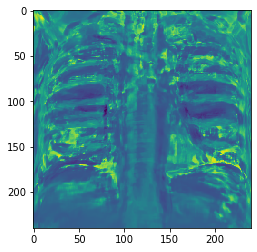

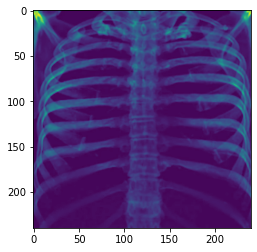

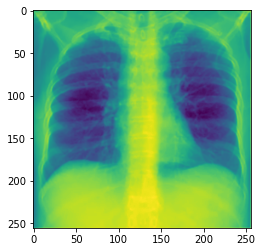

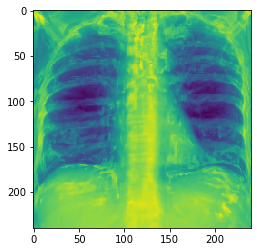

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(full_input_reconstruction_final, interpolation='nearest')
plt.show()
plt.imshow(img_bone_1_data_rs[8:len(img_full_1_data_rs)-8,8:len(img_full_1_data_rs)-8])
plt.show()

plt.imshow(img_full_1_data_rs)
plt.show()
plt.imshow(img_full_1_data_rs[8:len(img_full_1_data_rs)-8,8:len(img_full_1_data_rs)-8] + 0.5 * full_input_reconstruction_final, interpolation='nearest')
plt.show()